<a href="https://colab.research.google.com/github/vchen19/baltimore-food-insecurity/blob/main/2021_05_4_food_desert_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baltimore City Food Desert Analysis 

# Import Libraries

First we will import the libraries needed to run our code in later sections

In [ ]:
#These are the libraries that need to be installed in order to use Folium to create the map
#Citation: The following code in this block comes from https://colab.research.google.com/github/shakasom/GDS/blob/master/Part1%20-%20Introduction.ipynb
%%time 
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

In [ ]:
#Citation: some of the imported libraries are from https://colab.research.google.com/github/shakasom/GDS/blob/master/Part1%20-%20Introduction.ipynb
#data visualization libraries
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import geopandas as gpd
from shapely.geometry import Point 
import folium
import plotly_express as px
#data analysis
import pandas as pd
#import files to our computer
from google.colab import files

# Map Visualizations

First we will import data from this [github repository](https://github.com/shannonpowelson/Baltimore-food-desert-analysis/blob/main/Grocery_Store%20(2).csv)

In [ ]:
#import csv of grocery stores in Baltimore City from our github repository (this data is originally from the Baltimore Open Data website)
#save the csv link
grocery = 'https://raw.githubusercontent.com/shannonpowelson/Baltimore-food-desert-analysis/main/Grocery_Store%20(2).csv'

Create the initial data frame

In [ ]:
#define the data frame
df_grocery = pd.read_csv(grocery)

Create a new data frame

In [ ]:
#Make a new data frame that contains the full address (with street address, city, state, and zipcode)
df_grocery['Full Address'] = df_grocery['address'] + ', ' + df_grocery['city'] + ', ' + df_grocery['state'] + ', ' + df_grocery['zipcode']

Convert this modified spreadsheet into a csv and download

In [ ]:
#Convert the spreadsheet into a csv
df_grocery.to_csv('grocerylist.csv')

In [ ]:
#Download the csv onto the computer
#This csv that contains the full address will be used to find the latitude and longitude for each grocery store in Baltimore City
files.download('grocerylist.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Import data from this [github repository](https://github.com/shannonpowelson/Baltimore-food-desert-analysis/blob/main/grocerylist.csv) for the Grocery Stores

In [ ]:
#import csv of grocery stores in Baltimore City from our github repository.  This csv contains the latitude and longitude of the grocery stores
#The latitude and longitude were manually added to the csv that was previously downloaded from this code and onto the computer 
geogrocery = 'https://raw.githubusercontent.com/shannonpowelson/Baltimore-food-desert-analysis/main/grocerylist.csv'

Create the initial data frame

In [ ]:
#define the data frame
df_geogrocery = pd.read_csv(geogrocery)

Create a list of the latitude and longitude for each grocery store 

In [ ]:
#extract the latitude and longitude from the data frame and put it into a list
#Citation: https://georgetsilva.github.io/posts/mapping-points-with-folium/
locations = df_geogrocery[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()

Import data from this [github repository](https://github.com/shannonpowelson/Baltimore-food-desert-analysis/blob/main/Charm%20City%20Circulator%20-%20Purple%20Line.csv) for the purple line

In [ ]:
#import csv of purple line bus stops in Baltimore City from our github repository.  This csv contains the latitude and longitude of the purple line bus stops
purpleline = 'https://raw.githubusercontent.com/shannonpowelson/Baltimore-food-desert-analysis/main/Charm%20City%20Circulator%20-%20Purple%20Line.csv'

Create the initial data frame

In [ ]:
#Define the data frame
df_purpleline = pd.read_csv(purpleline)

Create a list of the latitude and longitude for each purple line bus stop




In [ ]:
#extract the latitude and longitude from the data frame and put it into a list
#Citation: https://georgetsilva.github.io/posts/mapping-points-with-folium/
purplelocation = df_purpleline[['Latitude ', 'Longitude']]
purplelist = purplelocation.values.tolist()

Import data from this [github repository](https://github.com/shannonpowelson/Baltimore-food-desert-analysis/blob/main/Charm%20City%20Circulator%20-%20Green%20Line.csv) for the green line

In [ ]:
#import csv of green line bus stops in Baltimore City from our github repository.  This csv contains the latitude and longitude of the green line bus stops
greenline = 'https://raw.githubusercontent.com/shannonpowelson/Baltimore-food-desert-analysis/main/Charm%20City%20Circulator%20-%20Green%20Line.csv'

Create the initial data frame

In [ ]:
#Define the data frame
df_greenline = pd.read_csv(greenline)

Create a list of the latitude and longitude for each green line bus stop

In [ ]:
#extract the latitude and longitude from the data frame and put it into a list
#Citation: https://georgetsilva.github.io/posts/mapping-points-with-folium/
greenlocation = df_greenline[['Latitude', 'Longitude']]
greenlist = greenlocation.values.tolist()

Import data from this [github repository](https://github.com/shannonpowelson/Baltimore-food-desert-analysis/blob/main/Charm%20City%20Circulator%20-%20Blue%20Line.csv) for the blue line

In [ ]:
#import csv of blue line bus stops in Baltimore City from our github repository.  This csv contains the latitude and longitude of the blue line bus stops
blueline = 'https://raw.githubusercontent.com/shannonpowelson/Baltimore-food-desert-analysis/main/Charm%20City%20Circulator%20-%20Blue%20Line.csv'

Create the initial data frame

In [ ]:
#Define the data frame
df_blueline = pd.read_csv(blueline)

Create a list of the latitude and longitude for each blue line bus stop

In [ ]:
#extract the latitude and longitude from the data frame and put it into a list
#Citation: https://georgetsilva.github.io/posts/mapping-points-with-folium/
bluelocation = df_blueline[['Latitude', 'Longitude']]
bluelist = bluelocation.values.tolist()

Import data from this [github repository](https://github.com/shannonpowelson/Baltimore-food-desert-analysis/blob/main/Charm%20City%20Circulator%20-%20Orange%20Line.csv) for the orange line

In [ ]:
#import csv of orange line bus stops in Baltimore City from our github repository.  This csv contains the latitude and longitude of the orange line bus stops
orangeline = 'https://raw.githubusercontent.com/shannonpowelson/Baltimore-food-desert-analysis/main/Charm%20City%20Circulator%20-%20Orange%20Line.csv'

Create the initial data frame

In [ ]:
#Define the data frame
df_orangeline = pd.read_csv(orangeline)

Create a list of the latitude and longitude for each orange line bus stop

In [ ]:
#extract the latitude and longitude from the data frame and put it into a list
#Citation: https://georgetsilva.github.io/posts/mapping-points-with-folium/
orangelocation = df_orangeline[['Latitude', 'Longitude']]
orangelist = orangelocation.values.tolist()

Import data from this [github repository](https://github.com/shannonpowelson/Baltimore-food-desert-analysis/blob/main/Food_Vendor_Locations.csv) for the street food vendors

In [ ]:
#import csv of street food vendors in Baltimore City from our github repository.  This csv contains the latitude and longitude of the street food vendors
vendors = 'https://raw.githubusercontent.com/shannonpowelson/Baltimore-food-desert-analysis/main/Food_Vendor_Locations.csv'

Create the initial data frame

In [ ]:
#Define the data frame
df_vendors = pd.read_csv(vendors)

Create a list of the latitude and longitude for each street food vendor

In [ ]:
#extract the latitude and longitude from the data frame and put it into a list
#Citation: https://georgetsilva.github.io/posts/mapping-points-with-folium/
vendorlocation = df_vendors[['Latitude', 'Longitude']]
vendorlist = vendorlocation.values.tolist()

Create a map with the grocery stores and the bus stops for the purple, blue, green, and orange lines

In [ ]:
#Create a map using Folium
#Citation: https://georgetsilva.github.io/posts/mapping-points-with-folium/
#Set the map boundaries
map = folium.Map(location=[39.2904, -76.6122], zoom_start=12)
#The following code plots the points for each location
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df_geogrocery['address'][point], icon=folium.Icon(color='black', icon='none')).add_to(map)
for point in range(0, len(purplelist)):
    folium.Marker(purplelist[point], popup=df_purpleline['Address'][point], icon=folium.Icon(color='purple', icon='none')).add_to(map)
for point in range(0, len(greenlist)):
    folium.Marker(greenlist[point], popup=df_greenline['Address'][point], icon=folium.Icon(color='green', icon='none')).add_to(map)
for point in range(0, len(bluelist)):
    folium.Marker(bluelist[point], popup=df_blueline['Address'][point], icon=folium.Icon(color='darkblue', icon='none')).add_to(map)
for point in range(0, len(orangelist)):
    folium.Marker(orangelist[point], popup=df_orangeline['Address'][point], icon=folium.Icon(color='orange', icon='none')).add_to(map)
#Display the map
map

Add the street food vendors to the map

In [ ]:
#Create a map using Folium
#Citation: https://georgetsilva.github.io/posts/mapping-points-with-folium/
#Set the map boundaries
map2 = folium.Map(location=[39.2904, -76.6122], zoom_start=12)
#The following code plots the points for each location
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df_geogrocery['address'][point], icon=folium.Icon(color='black', icon='none')).add_to(map2)
for point in range(0, len(purplelist)):
    folium.Marker(purplelist[point], popup=df_purpleline['Address'][point], icon=folium.Icon(color='purple', icon='none')).add_to(map2)
for point in range(0, len(greenlist)):
    folium.Marker(greenlist[point], popup=df_greenline['Address'][point], icon=folium.Icon(color='green', icon='none')).add_to(map2)
for point in range(0, len(bluelist)):
    folium.Marker(bluelist[point], popup=df_blueline['Address'][point], icon=folium.Icon(color='darkblue', icon='none')).add_to(map2)
for point in range(0, len(orangelist)):
    folium.Marker(orangelist[point], popup=df_orangeline['Address'][point], icon=folium.Icon(color='orange', icon='none')).add_to(map2)
for point in range(0, len(vendorlist)):
    folium.Marker(vendorlist[point], popup=df_vendors['VendorAddr'][point], icon=folium.Icon(color='lightblue', icon='none')).add_to(map2)
#Display the map
map2

# Bar Graph Visualization

Create a bar graph of the amounts of each food source 

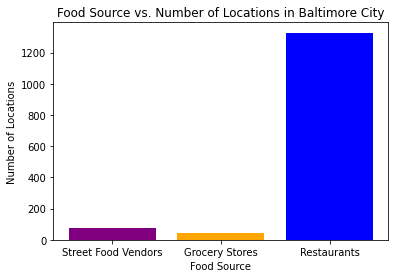

In [ ]:
#Citation: https://datatofish.com/bar-chart-python-matplotlib/

bargraph = plt.figure() #This will be used to later save the graph as a png

#The lists containing the food source name, amount, and color
food = ['Street Food Vendors', 'Grocery Stores', 'Restaurants']
amount = [77, 45, 1327]
colors = ['purple', 'orange', 'blue']

plt.bar(food, amount, color=colors) #This creates the bar graph
plt.title('Food Source vs. Number of Locations in Baltimore City') #This plots the title
plt.xlabel('Food Source') #This plots the x axis label
plt.ylabel('Number of Locations') #This plots the y axis label
plt.show() #This displays the graph

Save the graph and download it

In [ ]:
#Save the graph as a png
bargraph.savefig('foodsourcegraph.png')
#Download the graph onto the computer
files.download('foodsourcegraph.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Pie Chart Visualization

Put all of the items sold by street food vendors into the same list

In [ ]:
#Citation: https://www.geeksforgeeks.org/python-convert-list-of-string-to-list-of-list/
#Put all of the items from the 'ItemsSold' column in the data frame into a list
items = df_vendors['ItemsSold']
values = []
for i in items:
  res = i.split(", ")
  values.append(res)
print(values)

[['Grilled food', 'pizza slices', 'gyro sandwiches'], ['Hot Dogs', 'Sausage', 'Snacks', 'Gum', 'Candies', 'Drinks'], ['Hot dogs', 'Sausage', 'drinks', 'snacks', 'gum', '& candy'], ['Hot dogs', 'sausages', 'chips', 'snacks', 'drinks', 'gum'], ['Large & Small beef franks', 'soft drinks', 'water', 'all types of nuts & chips'], ['Hot dogs', 'Sodas', 'Chips'], ['Hot dogs', 'Sausages', 'Prepackaged snacks', 'Sodas', 'Water', 'Juice', 'Coffee'], ['Hot dogs', 'snacks', 'coffee and soda'], ['Hot Dogs', 'Burgers', 'Sausage', 'Chips', 'Soda', 'Water', 'Pretzels'], ['Hot Dogs', 'Burgers', 'Sausage', 'Chips', 'Soda', 'Water', 'Pretzels'], ['Hot dogs', 'hamburgers', 'soda', 'water'], ['Peanuts', 'Pistachios', 'Water & Soda'], ['Hot dogs', 'sodas', 'peanuts & chips'], ['Hot dogs', 'chips', 'sodas'], ['Hot dogs', 'chips & sodas'], ['Hot dogs', 'sodas', 'chips'], ['bottled water', 'soda & gatorade'], ['Hot dogs', 'chips', 'sodas & candy'], ['Hot dogs', 'sodas & peanuts'], ['Hot dogs', 'sodas & peanuts'

Make the list a list of strings instead of a list of lists

In [ ]:
#Citation: https://stackabuse.com/python-how-to-flatten-list-of-lists/
#Get rid of the nested list
#Make a new list that contains all strings 
full_list = []
for element in values:
  if type(element) is list:
    for y in element:
      full_list.append(y)
  else:
    full_list.append(element)
print(full_list)

['Grilled food', 'pizza slices', 'gyro sandwiches', 'Hot Dogs', 'Sausage', 'Snacks', 'Gum', 'Candies', 'Drinks', 'Hot dogs', 'Sausage', 'drinks', 'snacks', 'gum', '& candy', 'Hot dogs', 'sausages', 'chips', 'snacks', 'drinks', 'gum', 'Large & Small beef franks', 'soft drinks', 'water', 'all types of nuts & chips', 'Hot dogs', 'Sodas', 'Chips', 'Hot dogs', 'Sausages', 'Prepackaged snacks', 'Sodas', 'Water', 'Juice', 'Coffee', 'Hot dogs', 'snacks', 'coffee and soda', 'Hot Dogs', 'Burgers', 'Sausage', 'Chips', 'Soda', 'Water', 'Pretzels', 'Hot Dogs', 'Burgers', 'Sausage', 'Chips', 'Soda', 'Water', 'Pretzels', 'Hot dogs', 'hamburgers', 'soda', 'water', 'Peanuts', 'Pistachios', 'Water & Soda', 'Hot dogs', 'sodas', 'peanuts & chips', 'Hot dogs', 'chips', 'sodas', 'Hot dogs', 'chips & sodas', 'Hot dogs', 'sodas', 'chips', 'bottled water', 'soda & gatorade', 'Hot dogs', 'chips', 'sodas & candy', 'Hot dogs', 'sodas & peanuts', 'Hot dogs', 'sodas & peanuts', 'nuts & confections', 'hot dogs,burge

Make all of the strings lowercase

In [ ]:
#Citation: https://www.kite.com/python/answers/how-to-make-the-elements-in-a-list-of-strings-lowercase-in-python
#Make all of the words in the list lowercase
for z in range(len(full_list)):
  full_list[z] = full_list[z].lower()
print(full_list)

['grilled food', 'pizza slices', 'gyro sandwiches', 'hot dogs', 'sausage', 'snacks', 'gum', 'candies', 'drinks', 'hot dogs', 'sausage', 'drinks', 'snacks', 'gum', '& candy', 'hot dogs', 'sausages', 'chips', 'snacks', 'drinks', 'gum', 'large & small beef franks', 'soft drinks', 'water', 'all types of nuts & chips', 'hot dogs', 'sodas', 'chips', 'hot dogs', 'sausages', 'prepackaged snacks', 'sodas', 'water', 'juice', 'coffee', 'hot dogs', 'snacks', 'coffee and soda', 'hot dogs', 'burgers', 'sausage', 'chips', 'soda', 'water', 'pretzels', 'hot dogs', 'burgers', 'sausage', 'chips', 'soda', 'water', 'pretzels', 'hot dogs', 'hamburgers', 'soda', 'water', 'peanuts', 'pistachios', 'water & soda', 'hot dogs', 'sodas', 'peanuts & chips', 'hot dogs', 'chips', 'sodas', 'hot dogs', 'chips & sodas', 'hot dogs', 'sodas', 'chips', 'bottled water', 'soda & gatorade', 'hot dogs', 'chips', 'sodas & candy', 'hot dogs', 'sodas & peanuts', 'hot dogs', 'sodas & peanuts', 'nuts & confections', 'hot dogs,burge

Create a dictionary with the amount of each item sold

In [ ]:
#Citation: https://stackoverflow.com/questions/33726361/counting-the-number-of-unique-words-in-a-list
#Create a dictionary that contains the food name as the key and the number of times it is in the list as the value
count = {}
for m in full_list:
  if m in count:
    count[m] += 1
  else:
    count[m] = 1
print(count)

{'grilled food': 1, 'pizza slices': 1, 'gyro sandwiches': 2, 'hot dogs': 52, 'sausage': 4, 'snacks': 10, 'gum': 4, 'candies': 1, 'drinks': 7, '& candy': 1, 'sausages': 3, 'chips': 32, 'large & small beef franks': 1, 'soft drinks': 1, 'water': 19, 'all types of nuts & chips': 1, 'sodas': 16, 'prepackaged snacks': 1, 'juice': 8, 'coffee': 3, 'coffee and soda': 1, 'burgers': 6, 'soda': 25, 'pretzels': 4, 'hamburgers': 4, 'peanuts': 7, 'pistachios': 3, 'water & soda': 2, 'peanuts & chips': 1, 'chips & sodas': 1, 'bottled water': 3, 'soda & gatorade': 1, 'sodas & candy': 1, 'sodas & peanuts': 2, 'nuts & confections': 1, 'hot dogs,burgers,& tenders': 1, 'chili,hot & cold sandwiches': 1, 'chips,nachos & fries': 1, 'crab/fish cakes': 1, 'tacos': 1, 'breakfast sandwiches & pastries': 1, 'snowballs': 5, 'hot & cold drinks': 1, 'peanuts & hot dogs': 2, 'produce': 1, 'fruit': 1, 'vegetables': 1, 'italian sausages': 1, 'peanuts & sodas': 1, 'beef hot dogs': 1, 'chicken kabobs': 1, 'water,peanuts': 

Get rid of food items that only appear once

In [ ]:
#Citation: https://stackoverflow.com/questions/29218750/what-is-the-best-way-to-remove-a-dictionary-item-by-value-in-python
#In order to narrow the search and focus on common items being sold, we get rid of the items that only appear once in the list
count = {key:val for key, val in count.items() if val != 1}
print(count)

{'gyro sandwiches': 2, 'hot dogs': 52, 'sausage': 4, 'snacks': 10, 'gum': 4, 'drinks': 7, 'sausages': 3, 'chips': 32, 'water': 19, 'sodas': 16, 'juice': 8, 'coffee': 3, 'burgers': 6, 'soda': 25, 'pretzels': 4, 'hamburgers': 4, 'peanuts': 7, 'pistachios': 3, 'water & soda': 2, 'bottled water': 3, 'sodas & peanuts': 2, 'snowballs': 5, 'peanuts & hot dogs': 2, 'gyros': 2, 'jumbo hot dogs': 2, 'polish sausage': 2, 'cotton candy': 2, 'candy': 9, 'cookies': 5, 'lamb': 2, 'chicken': 2}


Put the food type into a list and the value into a list

In [ ]:
#Citation: https://pythonexamples.org/python-dictionary-keys-to-list/#:~:text=To%20convert%20Python%20Dictionary%20keys,with%20dictionary%20keys%20as%20elements.
#Make two lists
#One list should contain only the keys from the dictionary 
#One list should contain only the values from the dictionary
keyslist = list(count.keys())
valueslist = list(count.values())
print(keyslist)
print(valueslist)

['gyro sandwiches', 'hot dogs', 'sausage', 'snacks', 'gum', 'drinks', 'sausages', 'chips', 'water', 'sodas', 'juice', 'coffee', 'burgers', 'soda', 'pretzels', 'hamburgers', 'peanuts', 'pistachios', 'water & soda', 'bottled water', 'sodas & peanuts', 'snowballs', 'peanuts & hot dogs', 'gyros', 'jumbo hot dogs', 'polish sausage', 'cotton candy', 'candy', 'cookies', 'lamb', 'chicken']
[2, 52, 4, 10, 4, 7, 3, 32, 19, 16, 8, 3, 6, 25, 4, 4, 7, 3, 2, 3, 2, 5, 2, 2, 2, 2, 2, 9, 5, 2, 2]


Graph the pie chart

In [ ]:
#Citation: https://www.geeksforgeeks.org/pie-plot-using-plotly-in-python/

#Use the two lists to make the pie chart using plotly express
fig = px.pie(values=valueslist, names=keyslist, title='Items Sold by Street Food Vendors in Baltimore City')
fig.show()